In [21]:
# http://darribas.org/gds15/content/labs/lab_03.html
# http://andrewgaidus.com/leaflet_webmaps_python/
# https://nbviewer.jupyter.org/github/mrcork/OCR_LDS/blob/master/LondonMaps.ipynb
# https://www.earthdatascience.org/courses/earth-analytics-python/spatial-data-vector-shapefiles/python-customize-map-legends-geopandas/
# http://rpubs.com/BrunoVoisin/csomaps

In [22]:
# !pip install Shapely
# !pip install pyshp
# !pip install geopandas
# !pip install matplotlib
# !pip install descartes

In [23]:
# import csv
# import shapefile
import numpy as np
import pandas as pd

import shapefile # pyshp
import descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd
print(gpd.__version__)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.cm import *
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.display import Image as ImageShow

0.4.1


In [24]:
# %cd ../../data/airbnbdata/geo/shapefiles/dcc-admin-areas
# %cd ../../data/airbnbdata/geo/shapefiles/electoral-divisions-gps-projection
# %cd ../../data/airbnbdata/geo/shapefiles/small-areas-gps-projection
%cd ../../data/airbnbdata/geo/shapefiles/dcc-development-planning
!ls

[Errno 2] No such file or directory: '../../data/airbnbdata/geo/shapefiles/dcc-development-planning'
/usr/local/bin/notebooks/data/airbnbdata/geo/shapefiles/dcc-development-planning
dbodevplan2010transport2010p20111014-1259.dbf
dbodevplan2010transport2010p20111014-1259.prj
dbodevplan2010transport2010p20111014-1259.shp
dbodevplan2010transport2010p20111014-1259.shx
dccdevelopmentplanp20141002-1159.dbf
dccdevelopmentplanp20141002-1159.prj
dccdevelopmentplanp20141002-1159.shp
dccdevelopmentplanp20141002-1159.shx
dccdevelopmentplanp20141002-1159_converted.cpg
dccdevelopmentplanp20141002-1159_converted.dbf
dccdevelopmentplanp20141002-1159_converted.prj
dccdevelopmentplanp20141002-1159_converted.shp
dccdevelopmentplanp20141002-1159_converted.shx


In [25]:
# Convert
# https://gis.stackexchange.com/questions/302699/extracting-longitude-and-latitude-from-shapefile

# street_map = gpd.read_file("dccdevelopmentplanp20141002-1159_converted.shp")
# street_map_geo = street_map.to_crs(epsg=4326)  # EPSG 4326 = WGS84 = https://epsg.io/4326
# street_map_geo.to_file('dccdevelopmentplanp20141002-1159_converted.shp')

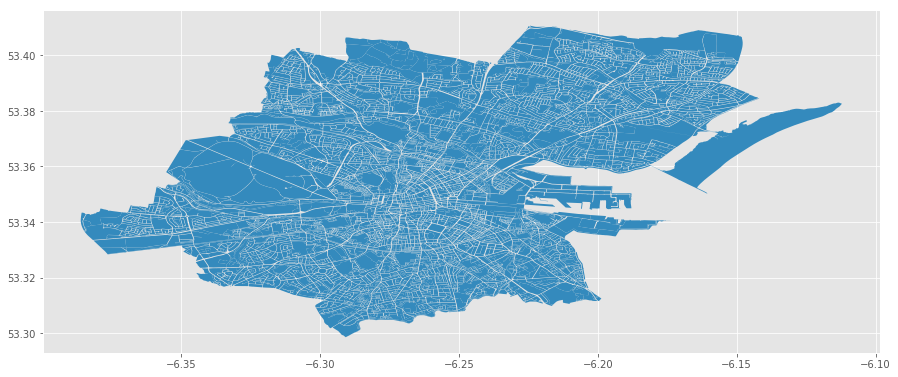

In [26]:
street_map_geo = gpd.read_file("dccdevelopmentplanp20141002-1159_converted.shp")
fig, ax = plt.subplots(figsize = (15,15))
street_map_geo.plot(ax=ax)

In [27]:
# street_map.loc[1, 'geometry']

In [28]:
%pwd
%cd ../../../
filename = '201702_listings_preproc.csv' # 15 cols

df_read = pd.read_csv(filename,
                       encoding='utf-8',
#                        compression='gzip',
                       sep=',',
                       index_col = 'host_id',
                       header=0
                       )

print(df_read.shape)
df_read.head(1)
# df_read.columns

/usr/local/bin/notebooks/data/airbnbdata
(5376, 93)


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
host_id,,,,,,,,,,,,,,,,,,,,,
51820708,https://www.airbnb.com/rooms/10778114,20170218121908,2017-02-18,1 Bedroom Apartment For Short Term,Contact for more info,- Kitchen - Wifi - PS4,Contact for more info - Kitchen - Wifi - PS4 1...,none,NaN,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [29]:
df = df_read.copy()
df = df[['longitude', 'latitude', 'street']]
crs = {'init':'epsg:4326'}
df.head(1)
# df.longitude.describe()
# df.latitude.describe()

,longitude,latitude,street
host_id,,,
51820708,-6.234601,53.338696,"South Lotts Road, Dublin, Dublin Dublin 4, Ire..."


In [30]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]

In [31]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head(1)
# print(len(geo_df))
# geo_df = geo_df[(geo_df['latitude'] <= 53.36975) & (geo_df['latitude'] >= 53.31813)]
# geo_df = geo_df[(geo_df['longitude'] >= -6.320981) & (geo_df['longitude'] <= -6.194039)]
# print(len(geo_df))

,longitude,latitude,street,geometry
host_id,,,,
51820708,-6.234601,53.338696,"South Lotts Road, Dublin, Dublin Dublin 4, Ire...",POINT (-6.234601104389127 53.33869571152222)


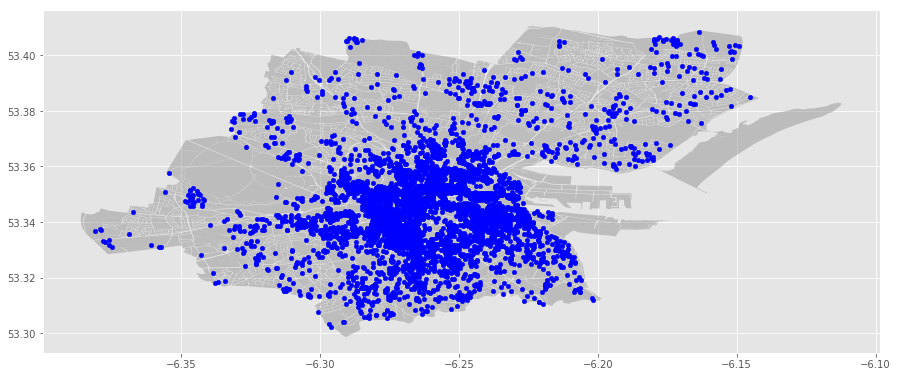

In [32]:
fig, ax = plt.subplots(figsize = (15,15))
street_map_geo.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o')